In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [21]:
with open('/content/OnlineRetail.csv') as f:
    print(f)

<_io.TextIOWrapper name='/content/OnlineRetail.csv' mode='r' encoding='UTF-8'>


In [42]:
df = pd.read_csv('/content/OnlineRetail.csv', encoding = 'UTF-8', error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [43]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [217]:
class KMeansClustering():
    """
        Class for implementing K Means Clustering Algorithm.
    """
    def __init__(self) -> None:
        pass

    def fit(self, X, K = 5, tol=0.000001, max_iter = 500):
        """
            Used to calculate centroids for each cluster.
            : param X: 2D array, matrix of features, with each row being a data entry
            : param K: int, the number of clusters to form as well as the number of centroids to generate.
            : param tol: float, relative tolerance with regards to Frobenius norm of the difference in the cluster centers of two consecutive iterations to declare convergence.
            : param max_iter: int, maximum number of iterations of the k-means algorithm for a single run.
            : return: None
        """
        X = np.array(X)
        self.centroids = {}

        for i in range(K):
            self.centroids[i] = X[i]

        for i in range(max_iter):
            self.classifications = {}

            for i in range(K):
                self.classifications[i] = []

            for featureset in X:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > tol:
                    # print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break
        
    def predict(self,X):
        """
            Used to predict the value of y
            : param X: 2D array, matrix of features, with each row being a data entry
            : return: array, predicted values
        """
        distances = [np.linalg.norm(X-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification


In [105]:
class Preprocessing():
    """
        Class for implementing preprocessing functions to normalize data.
    """
    def __init__(self):
        pass
    
    def mean_normalization(self, X, train = False):
        """
            Used to apply mean normalization to the data.
            : param X: scalar or array,
            : param train: boolean, true if training set if being normalized, false otherwise 
            : return: 2D array, normalized data
        """
        if train:
            self.mean = X.mean()
            self.max = X.max()
            self.min = X.min()
        normalized_df = (X - self.mean) / (self.max - self.min)
        return normalized_df
    
    def standardization(self, X, train = False):
        """
            Used to apply standardization to the data.
            : param X: scalar or array,
            : param train: boolean, true if training set if being normalized, false otherwise 
            : return: 2D array, normalized data
        """
        if train:
            self.mean = X.mean()
            self.std = X.std()
        normalized_df = (X - self.mean) / self.std
        return normalized_df

In [52]:
df['CustomerID'].nunique()

4372

In [54]:
df['Total'] = df['Quantity'] * df['UnitPrice']

In [55]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   Total        541909 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB


In [66]:
df = df.dropna()

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
 8   Total        406829 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 31.0+ MB


In [68]:
df['CustomerID'].nunique()

4372

In [71]:
X = df.groupby('CustomerID')

In [75]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [78]:
df.Country.value_counts(normalize=True)

United Kingdom          0.889509
Germany                 0.023339
France                  0.020871
EIRE                    0.018398
Spain                   0.006226
Netherlands             0.005828
Belgium                 0.005086
Switzerland             0.004614
Portugal                0.003638
Australia               0.003095
Norway                  0.002669
Italy                   0.001974
Channel Islands         0.001863
Finland                 0.001708
Cyprus                  0.001529
Sweden                  0.001136
Austria                 0.000986
Denmark                 0.000956
Japan                   0.000880
Poland                  0.000838
USA                     0.000715
Israel                  0.000615
Unspecified             0.000600
Singapore               0.000563
Iceland                 0.000447
Canada                  0.000371
Greece                  0.000359
Malta                   0.000312
United Arab Emirates    0.000167
European Community      0.000150
RSA       

In [79]:
df_UK = df[df['Country']=='United Kingdom']

In [80]:
df_UK.shape

(361878, 9)

In [81]:
df_UK = df_UK[df_UK['Quantity']>0]
df_UK.shape

(354345, 9)

In [82]:
df_UK['InvoiceDate'].max()

Timestamp('2011-12-10 17:19:00')

In [83]:
df_UK['InvoiceDate'].min()

Timestamp('2010-01-12 08:26:00')

In [86]:
print("Summary..")
#exploring the unique values of each attribute
print("Number of invoices: ", df_UK['InvoiceNo'].nunique())
print("Number of products bought: ",df_UK['StockCode'].nunique())
print("Number of customers:", df_UK['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(df_UK['CustomerID'].isnull().sum() * 100 / len(df_UK),2),"%" )
print("Average quantity of product purchased by a customer: ", round(np.mean(df_UK.groupby("CustomerID").Quantity.sum()), 0))
print("Average revenue generated per customer: ", round(np.mean(df_UK.groupby("CustomerID").Total.sum()), 2))
print("Average product quantity sold per transaction: ", round(df_UK.Quantity.mean(), 0))
print("Average revenue generated per transaction: ", round(df_UK.Total.mean(), 2) )

Summary..
Number of invoices:  16649
Number of products bought:  3645
Number of customers: 3921
Percentage of customers NA:  0.0 %
Average quantity of product purchased by a customer:  1089.0
Average revenue generated per customer:  1863.91
Average product quantity sold per transaction:  12.0
Average revenue generated per transaction:  20.63


In [180]:
recency_df = df_UK.groupby(by='CustomerID', as_index=False)['InvoiceDate'].max()
recency_df.columns = ['CustomerID','LastPurshaceDate']
recency_df.head()

,CustomerID,LastPurshaceDate
0,12346.0,2011-01-18 10:01:00
1,12747.0,2011-11-17 17:13:00
2,12748.0,2011-12-05 18:58:00
3,12749.0,2011-11-17 12:05:00
4,12820.0,2011-10-26 13:27:00


In [181]:
now = datetime.now()
recency_df['Recency'] = recency_df['LastPurshaceDate'].apply(lambda x: (now - x).days)

In [182]:
recency_df.head()

,CustomerID,LastPurshaceDate,Recency
0,12346.0,2011-01-18 10:01:00,4101
1,12747.0,2011-11-17 17:13:00,3797
2,12748.0,2011-12-05 18:58:00,3779
3,12749.0,2011-11-17 12:05:00,3798
4,12820.0,2011-10-26 13:27:00,3820


In [183]:
#drop LastPurchaseDate as we don't need it anymore
recency_df.drop('LastPurshaceDate',axis=1,inplace=True)

In [184]:
#CREATE FREQUENCY DATAFRAME
# drop duplicates
df_UK_copy = df_UK
df_UK_copy.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], inplace=True) 

#What we do is here is a bit complex compared to previous codes. I would like to calculate the number of invoices for each induvidual customer.
#Since dataset involves so many duplicates of ['InvoiceNo', 'CustomerID'], we are keeping just one.
#Call "retail_uk.head()" and look these two columns to understand better

#Calculate frequency of purchases
frequency_df = df_UK_copy.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,11
2,12748.0,210
3,12749.0,5
4,12820.0,4


In [185]:
#Amount spent by each individual customer
monetary_df = df_UK.groupby(by='CustomerID',as_index=False)['Total'].sum()
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,689.49
2,12748.0,3841.31
3,12749.0,98.35
4,12820.0,58.20


In [202]:
temp_df = recency_df.merge(frequency_df,on='CustomerID')
rfm_df = temp_df.merge(monetary_df,on='CustomerID')
#check the head
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,4101,1,77183.60
1,12747.0,3797,11,689.49
2,12748.0,3779,210,3841.31
3,12749.0,3798,5,98.35
4,12820.0,3820,4,58.20


In [203]:
rfm_df['Recency'] = rfm_df["Recency"] + 1

In [204]:
rfm_df.describe()

,CustomerID,Recency,Frequency,Monetary
count,3921.000000,3921.00000,3921.000000,3921.000000
mean,15561.471563,3881.31038,4.246111,293.299913
std,1576.823683,115.04197,7.205750,3261.756525
min,12346.000000,3775.00000,1.000000,0.000000
25%,14208.000000,3798.00000,1.000000,17.700000
50%,15569.000000,3837.00000,2.000000,45.400000
75%,16913.000000,3938.00000,5.000000,124.500000
max,18287.000000,4473.00000,210.000000,168471.250000


In [205]:
#outlier treatment: the algorithm we are going to use is vulnerable to outliers which are very very manipulative
#if you do not exclude outliers, the results will be heavily influenced

#outlier treatment for recency
Q1 = rfm_df.Recency.quantile(0.25)
Q3 = rfm_df.Recency.quantile(0.75)
IQR = Q3 - Q1
rfm_df = rfm_df[(rfm_df.Recency >= (Q1 - 1.5*IQR)) & (rfm_df.Recency <= (Q3 + 1.5*IQR))]
rfm_df.describe()

,CustomerID,Recency,Frequency,Monetary
count,3850.000000,3850.000000,3850.000000,3850.000000
mean,15554.099221,3872.425974,4.296883,297.761732
std,1576.031193,94.532556,7.242876,3291.501916
min,12346.000000,3775.000000,1.000000,0.000000
25%,14198.250000,3797.000000,1.000000,17.700000
50%,15555.500000,3836.000000,2.000000,46.720000
75%,16911.500000,3929.000000,5.000000,126.565000
max,18287.000000,4139.000000,210.000000,168471.250000


In [206]:
#outlier treatment for frequency
Q1 = rfm_df.Frequency.quantile(0.25)
Q3 = rfm_df.Frequency.quantile(0.75)
IQR = Q3 - Q1
rfm_df = rfm_df[(rfm_df.Frequency >= (Q1 - 1.5*IQR)) & (rfm_df.Frequency <= (Q3 + 1.5*IQR))]
rfm_df.describe()

,CustomerID,Recency,Frequency,Monetary
count,3590.000000,3590.000000,3590.000000,3590.000000
mean,15555.106407,3878.025070,2.993315,190.191398
std,1572.657886,95.272938,2.377910,3179.348629
min,12346.000000,3775.000000,1.000000,0.000000
25%,14211.250000,3800.000000,1.000000,17.000000
50%,15559.000000,3843.000000,2.000000,40.485000
75%,16913.750000,3939.750000,4.000000,100.907500
max,18287.000000,4139.000000,11.000000,168471.250000


In [207]:
#outlier treatment for monetary
Q1 = rfm_df.Monetary.quantile(0.25)
Q3 = rfm_df.Monetary.quantile(0.75)
IQR = Q3 - Q1
rfm_df = rfm_df[(rfm_df.Monetary >= (Q1 - 1.5*IQR)) & (rfm_df.Monetary <= (Q3 + 1.5*IQR))]
rfm_df.describe()

#After excluding outliers, 3147 customers are left

,CustomerID,Recency,Frequency,Monetary
count,3248.000000,3248.000000,3248.000000,3248.000000
mean,15554.811884,3881.852217,2.722291,53.932943
std,1559.840305,96.784921,2.121030,51.374138
min,12749.000000,3775.000000,1.000000,0.000000
25%,14223.750000,3801.000000,1.000000,15.900000
50%,15550.500000,3847.000000,2.000000,35.400000
75%,16891.250000,3949.000000,4.000000,76.825000
max,18287.000000,4139.000000,11.000000,226.380000


In [208]:
Preprocessor = Preprocessing()

rfm_df = Preprocessor.mean_normalization(rfm_df, train = True)
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
3,-0.506647,-0.227616,0.227771,0.196206
4,-0.493827,-0.167176,0.127771,0.018849
5,-0.493646,-0.029814,-0.172229,-0.150247
6,-0.493465,-0.095748,-0.072229,-0.102186
8,-0.493104,-0.208385,-0.172229,-0.215977


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


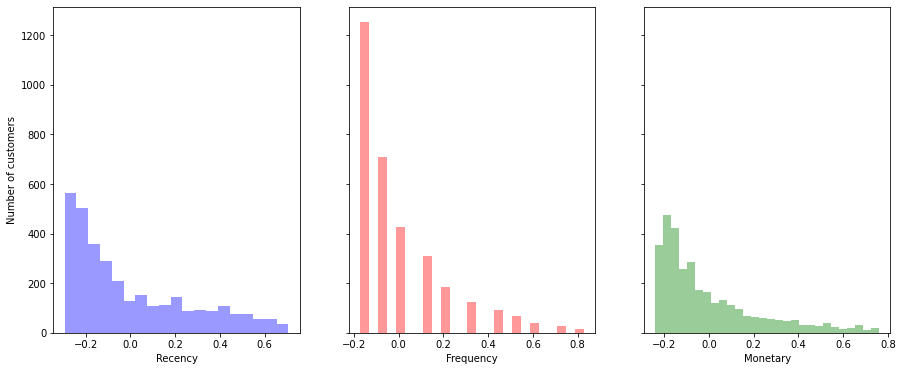

In [209]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows= 1, ncols= 3, sharey=True, figsize=(15, 6))

sns.distplot(rfm_df["Recency"], ax=ax0, kde=False, color='b')
ax0.set(xlabel="Recency", ylabel="Number of customers")

sns.distplot(rfm_df["Frequency"], ax=ax1, kde=False, color='r')
ax1.set(xlabel="Frequency")

sns.distplot(rfm_df["Monetary"], ax=ax2, kde=False, color='g')
ax2.set(xlabel="Monetary")


fig.savefig("Histograms of Attributes")

In [210]:
df = rfm_df
df.reset_index(drop=True, inplace=True)
df.head()

,CustomerID,Recency,Frequency,Monetary
0,-0.506647,-0.227616,0.227771,0.196206
1,-0.493827,-0.167176,0.127771,0.018849
2,-0.493646,-0.029814,-0.172229,-0.150247
3,-0.493465,-0.095748,-0.072229,-0.102186
4,-0.493104,-0.208385,-0.172229,-0.215977


In [219]:
model = KMeansClustering()
model.fit(df)

In [220]:
model.centroids

{0: array([-0.24200946, -0.17732963,  0.30501961,  0.35802408]),
 1: array([ 0.23875657, -0.1509908 ,  0.25644563,  0.25400737]),
 2: array([ 0.00532308,  0.41844757, -0.13392823, -0.10150183]),
 3: array([-0.25670905, -0.09164261, -0.06960947, -0.08058509]),
 4: array([ 0.24908518, -0.10511217, -0.07502301, -0.11305487])}

In [221]:
def plot(X, model, k=5, pt1 = 0, pt2 = 1):
    '''
    X : Dataframe with 2 columns
    '''

    r = lambda: np.random.randint(0,1)
    colors = ['green', 'red', 'orange', 'magenta', 'blue']
    if k > 5:
      for i in range(5, k):
        colors.append((r(), r(), r()))
    
    plt.figure(figsize=(10,6))
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    
    # print("The centroids are: ")
    for i, centroid in enumerate(model.centroids):
        plt.scatter(model.centroids[centroid][pt1], model.centroids[centroid][pt2],
                    marker="o", color=colors[i], s=150, linewidths=5, label=f'({model.centroids[centroid][pt1]:.1f}, {model.centroids[centroid][pt2]:.1f})')
        # print(f'x = {model.centroids[centroid][0]}, y = {model.centroids[centroid][1]}')

    for cf in model.classifications:
        color = colors[cf]
        for featureset in model.classifications[cf]:
            plt.scatter(featureset[pt1], featureset[pt2], marker="x", color=color, s=150, linewidths=5, alpha=0.5)

    plt.legend(title="Centroids")
    plt.show()


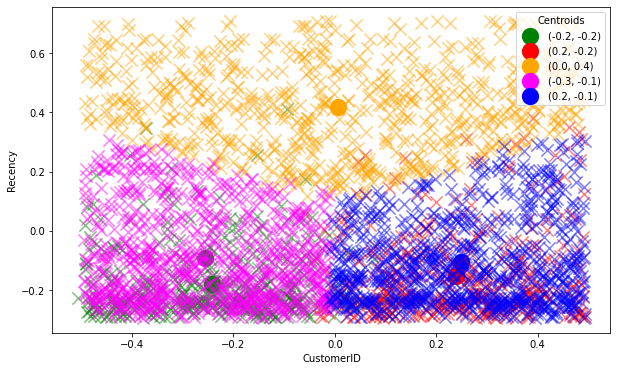

In [222]:
plot(df, model, 5)

In [227]:
model.classifications[0]

[array([-0.50664714, -0.22761598,  0.22777094,  0.19620575]),
 array([-0.49274321, -0.12871488,  0.42777094,  0.30420999]),
 array([-0.49238207,  0.01963677,  0.32777094,  0.44556523]),
 array([-0.49021522, -0.11223136,  0.12777094,  0.37400414]),
 array([-0.48967351, -0.10948411,  0.52777094,  0.30597693]),
 array([-0.4878678 ,  0.08007633,  0.32777094,  0.65494768]),
 array([-0.48768723, -0.27431928,  0.02777094,  0.46102596]),
 array([-0.48732609, -0.23860499,  0.32777094, -0.04131524]),
 array([-0.48533981, -0.21937422,  0.42777094, -0.0008523 ]),
 array([-0.48515924, -0.26882477,  0.32777094,  0.30928994]),
 array([-0.48461753, -0.06003356, -0.07222906,  0.54893125]),
 array([-0.48317297, -0.16717642,  0.02777094,  0.61307119]),
 array([-0.48281182, -0.02157202, -0.17222906,  0.62314275]),
 array([-0.48227011, -0.28805554, -0.17222906,  0.51270897]),
 array([-0.47829756, -0.25783576,  0.22777094,  0.67509081]),
 array([-0.47775585, -0.18091268,  0.22777094,  0.31781543]),
 array([

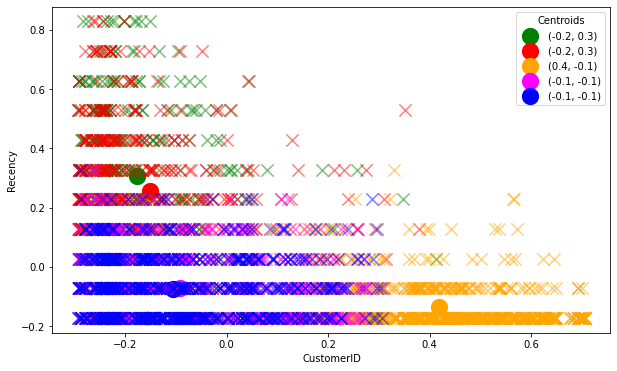

In [225]:
plot(df, model, 5, pt1 = 1, pt2 = 2)

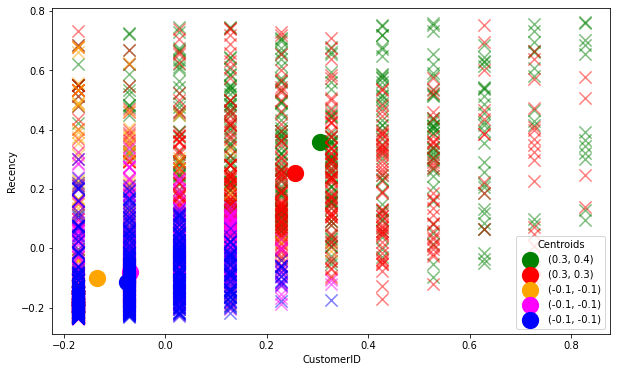

In [226]:
plot(df,model, 5, pt1 = 2, pt2 = 3)

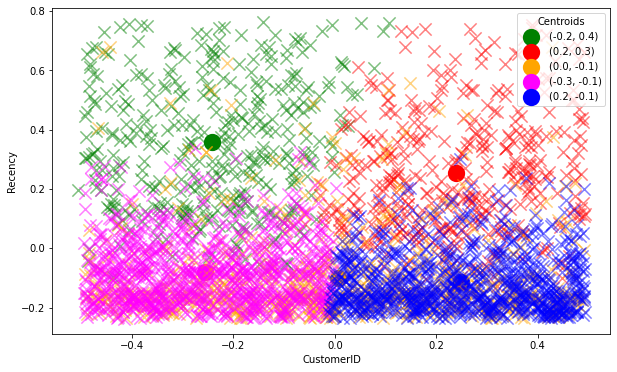

In [228]:
plot(df,model, 5, pt1 = 0, pt2 = 3)

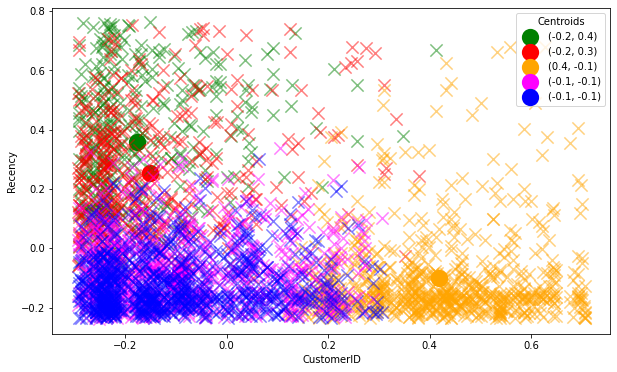

In [229]:
plot(df,model, 5, pt1 = 1, pt2 = 3)

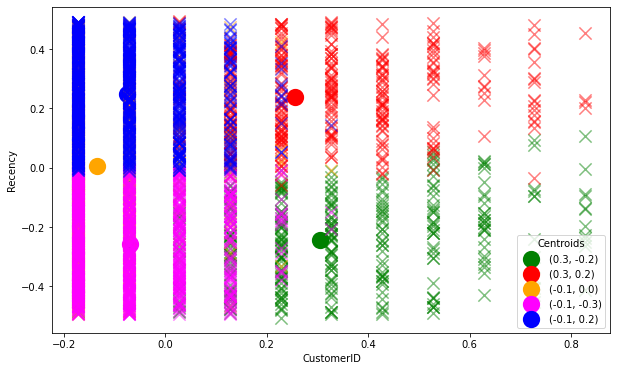

In [230]:
plot(df,model, 5, pt1 = 2, pt2 = 0)

In [237]:
model2 = KMeansClustering()
model2.fit(df, 3)

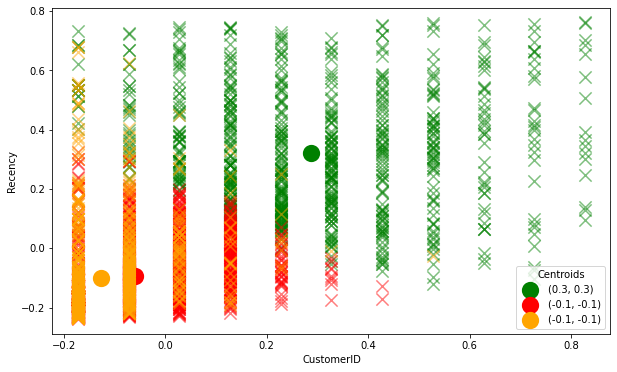

In [236]:
plot(df, model2, 3, pt1 = 2, pt2 = 3)